In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm

## Limpieza de datos

In [45]:
data = pd.read_excel("Copia de Compras.xls")
data.drop(["Cod_Motivo_Compra"], axis = "columns", inplace = True)
data.dropna(how = "all", inplace = True)

newData = data["Id_Proveedor_Sucursal"].str.split("|", n = 1, expand = True)
data.insert(2, column = "id_Proveedor", value = newData[0])
data.insert(3, column = "id_Sucursal", value = newData[1])

newFechaOrden = data["Fecha_Orden_Compra"].str.split("-", n = 2, expand = True)
data.insert(7, column = "ano_Orden", value = newFechaOrden[0].astype("int64"))
data.insert(8, column = "mes_Orden", value = newFechaOrden[1].astype("int64"))
data.insert(9, column = "dia_Orden", value = newFechaOrden[2].astype("int64"))

#newFechaRecibido = data["Recepcion_Max_Fecha_Real"].str.split("-", n = 2, expand = True)
#data.insert(30, column = "ano_Recepcion", value = newFechaRecibido[0].astype("int64"))
#data.insert(31, column = "mes_Recepcion", value = newFechaRecibido[1].astype("int64"))
#data.insert(32, column = "dia_Recepcion", value = newFechaRecibido[2].astype("int64"))
data["Recepcion_Max_Fecha_Real"] = (data["Recepcion_Max_Fecha_Real"].str.replace("-","")).astype("int64")

data.drop(["Id_Proveedor_Sucursal", "Fecha_Orden_Compra"], axis = "columns", inplace = True)

data["id_Proveedor"] = data["id_Proveedor"].astype("int64")
data["id_Sucursal"] = data["id_Sucursal"].astype("int64")
data["Compra_Cantidad"] = data["Compra_Cantidad"].astype("int64")
data["Compra_Pesos"] = data["Compra_Pesos"].astype("int64")
data["Compra_Precio_Unitario"] = data["Compra_Precio_Unitario"].astype("int64")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 0 to 9082
Data columns (total 31 columns):
Unnamed: 0                            9083 non-null int64
Cod_Producto                          9083 non-null int64
id_Proveedor                          9083 non-null int64
id_Sucursal                           9083 non-null int64
Cod_Bodega                            9083 non-null int64
Cod_Unidad_Negocio                    9083 non-null int64
ano_Orden                             9083 non-null int64
mes_Orden                             9083 non-null int64
dia_Orden                             9083 non-null int64
Cod_Centro_Operativo                  9083 non-null int64
Cod_Centro_Costos                     9083 non-null int64
Cod_Tipo_Documento                    9083 non-null object
Numero_Orden_Compra                   9083 non-null object
Linea_Orden_Compra                    9083 non-null int64
Fecha_Entrega_Planeada                9083 non-null object
Compra_Cantidad     

,Unnamed: 0,Cod_Producto,id_Proveedor,id_Sucursal,Cod_Bodega,Cod_Unidad_Negocio,ano_Orden,mes_Orden,dia_Orden,Cod_Centro_Operativo,...,Linea_Perfecta,Lead_Time_Teorico_Compra,Lead_Time_Real_Max_Compra,Lead_Time_Real_Min_Compra,Conteo_Linea_Compra,Recepcion_Cantidad_Recibida,Recepcion_Max_Fecha_Real,Recepcion_Cantidad_Primera_Entrega,Recepcion_Pesos_Primera_Entrega,Lead_Time_Primera_Entrega
0,0,10403,387,1,71,4,2018,5,11,11,...,0,10,34,34,1,6,20180614,6,405072,34
1,1,10403,387,1,71,4,2018,1,26,11,...,0,10,11,11,1,12,20180206,12,770160,11
2,2,10403,387,1,71,4,2018,4,23,11,...,0,10,16,16,1,21,20180509,21,1361042,16
3,3,10318,387,1,71,4,2018,4,23,11,...,0,10,16,16,1,6,20180509,6,532800,16
4,4,10403,387,1,71,4,2018,5,4,11,...,0,10,41,41,1,25,20180614,25,1687800,41


### Limpieza de valores atípicos

In [46]:
data.describe()

,Unnamed: 0,Cod_Producto,id_Proveedor,id_Sucursal,Cod_Bodega,Cod_Unidad_Negocio,ano_Orden,mes_Orden,dia_Orden,Cod_Centro_Operativo,...,Linea_Perfecta,Lead_Time_Teorico_Compra,Lead_Time_Real_Max_Compra,Lead_Time_Real_Min_Compra,Conteo_Linea_Compra,Recepcion_Cantidad_Recibida,Recepcion_Max_Fecha_Real,Recepcion_Cantidad_Primera_Entrega,Recepcion_Pesos_Primera_Entrega,Lead_Time_Primera_Entrega
count,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,...,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9083.000000,9.083000e+03,9083.000000,9.083000e+03,9083.000000
mean,4541.000000,24638.450842,2332.240890,1.019817,117.002422,3.753826,2018.204228,5.238578,16.251018,16.148189,...,0.336122,8.851591,33.870527,33.147088,0.976109,1062.332820,2.006697e+07,867.748982,5.899557e+06,10.807332
std,2622.180581,12647.602097,6745.482209,0.139380,74.037812,0.434115,0.403158,3.198698,8.437952,4.266019,...,0.472407,6.630194,80.598376,80.717884,0.152717,4808.947111,3.512305e+05,3729.104529,1.085545e+07,9.925381
min,0.000000,3639.000000,9.000000,1.000000,26.000000,3.000000,2018.000000,1.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900010e+07,0.000000,0.000000e+00,0.000000
25%,2270.500000,10401.000000,228.000000,1.000000,73.000000,4.000000,2018.000000,2.000000,9.000000,12.000000,...,0.000000,4.000000,6.000000,6.000000,1.000000,5.000000,2.018033e+07,5.000000,6.035800e+05,5.000000
50%,4541.000000,28757.000000,386.000000,1.000000,77.000000,4.000000,2018.000000,4.000000,17.000000,15.000000,...,0.000000,8.000000,10.000000,9.000000,1.000000,28.000000,2.018071e+07,25.000000,2.204256e+06,8.000000
75%,6811.500000,35394.000000,387.000000,1.000000,131.000000,4.000000,2018.000000,8.000000,23.000000,19.000000,...,1.000000,14.000000,19.000000,17.000000,1.000000,200.000000,2.018112e+07,182.000000,6.434733e+06,14.000000
max,9082.000000,40428.000000,27152.000000,2.000000,311.000000,5.000000,2019.000000,12.000000,31.000000,24.000000,...,1.000000,25.000000,458.000000,458.000000,1.000000,100000.000000,2.019041e+07,80000.000000,1.618800e+08,83.000000


In [47]:
data = data[data.Recepcion_Max_Fecha_Real != 19000101]

## Correlación de campos

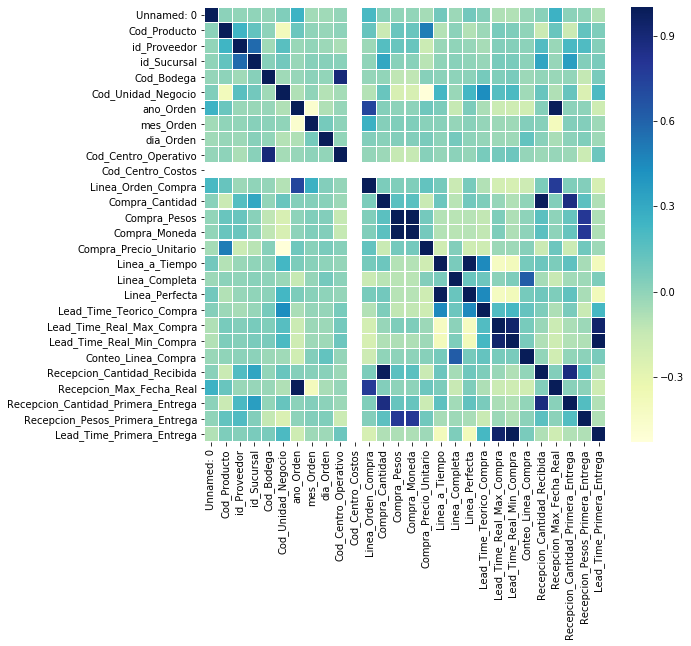

In [48]:
#Correlación
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

## Limpieza de variables con conrrelación alta

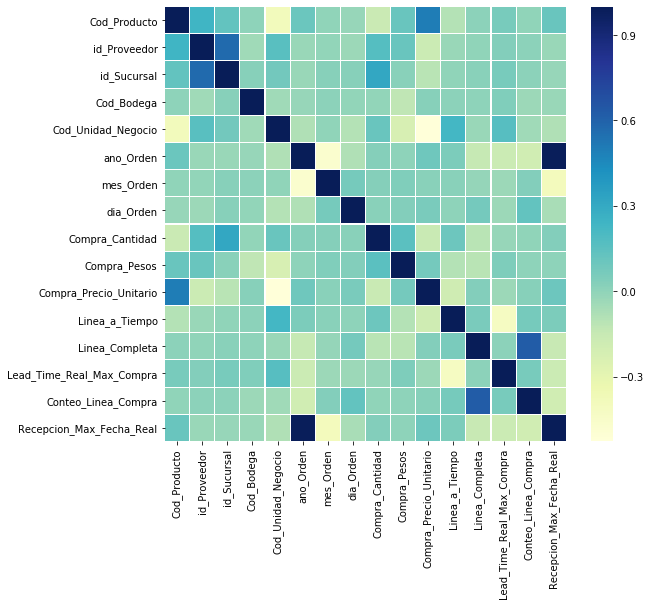

In [49]:
data.drop(["Cod_Tipo_Documento","Unnamed: 0","Cod_Centro_Costos","Cod_Centro_Operativo", "Compra_Moneda", "Linea_Perfecta", "Recepcion_Cantidad_Recibida", "Lead_Time_Real_Min_Compra", "Numero_Orden_Compra", "Linea_Orden_Compra", "Fecha_Entrega_Planeada","Lead_Time_Teorico_Compra", "Recepcion_Cantidad_Primera_Entrega", "Recepcion_Pesos_Primera_Entrega", "Lead_Time_Primera_Entrega"], axis = "columns", inplace = True)
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## Exploración de clusterización

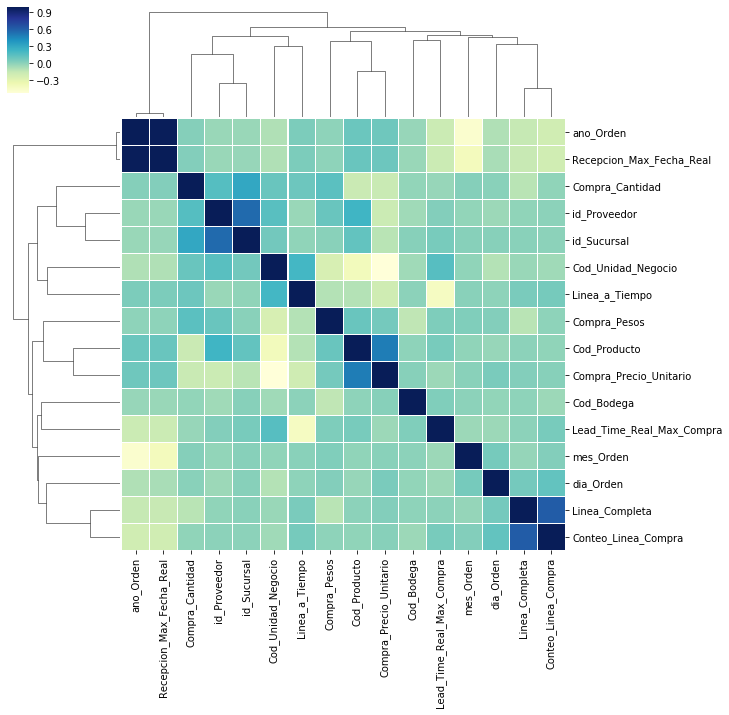

In [50]:
corrmat = data.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [51]:
data.info()
data.to_excel("ComprasClean.xlsx")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8195 entries, 0 to 9082
Data columns (total 16 columns):
Cod_Producto                 8195 non-null int64
id_Proveedor                 8195 non-null int64
id_Sucursal                  8195 non-null int64
Cod_Bodega                   8195 non-null int64
Cod_Unidad_Negocio           8195 non-null int64
ano_Orden                    8195 non-null int64
mes_Orden                    8195 non-null int64
dia_Orden                    8195 non-null int64
Compra_Cantidad              8195 non-null int64
Compra_Pesos                 8195 non-null int64
Compra_Precio_Unitario       8195 non-null int64
Linea_a_Tiempo               8195 non-null int64
Linea_Completa               8195 non-null int64
Lead_Time_Real_Max_Compra    8195 non-null int64
Conteo_Linea_Compra          8195 non-null int64
Recepcion_Max_Fecha_Real     8195 non-null int64
dtypes: int64(16)
memory usage: 1.1 MB


## Separación entre descriptores y variable objetivo

In [52]:
feat = data.drop(columns = ["Recepcion_Max_Fecha_Real"], axis = 1)
label = data["Recepcion_Max_Fecha_Real"]
#["Compra_Cantidad", "Compra_Pesos", "Compra_Precio_Unitario", "Lead_Time_Real_Max_Compra", "ano_Recepcion", "mes_Recepcion", "dia_Recepcion"]

In [53]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Separación del dataset en datos de entrenamiento y prueba

In [54]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size = 0.2)

In [55]:
#xgb_clf = OneVsRestClassifier(XGBClassifier(learning_rate =0.1,
 #n_estimators=50,
 #max_depth=5,
 #min_child_weight=1,
 #gamma=0,
 #subsample=0.8,
 #colsample_bytree=0.8,
 #objective='multi:softmax',
#num_class = 6,
 #nthread=4,
 #scale_pos_weight=1,
 #seed=27))
#mlb = MultiLabelBinarizer()
#y_train_multi = mlb.fit_transform(y_train)

#xgb_clf.fit(X_train, y_train_multi)

## Creación del modelo con técnica de arboles y entrenamiento

In [56]:
xgb_classifier = XGBClassifier(n_jobs = -1)
xgb_classifier.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predicción de la fecha real de recepción

In [57]:
y_pred_xgb = xgb_classifier.predict(X_test)

## Cálculo del error para cada predicción

In [58]:
error = ((((y_pred_xgb - y_test)) / y_test)*100).abs()

## Cálculo de precisión de valores exactos

In [59]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.15%


## Creación del modelo con técnica de regresión linear y entrenamiento

In [60]:
xgb_classifier_linear = XGBClassifier(n_jobs = -1, booster = 'gblinear')
xgb_classifier_linear.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predicción de la fecha real de recepción 

In [61]:
y_pred_xgb_linear = xgb_classifier_linear.predict(X_test)

## Cálculo del error para cada predicción

In [62]:
error_linear = ((((y_pred_xgb_linear - y_test)) / y_test)*100).abs()

## Cálculo de precisión de valores exactos

In [63]:
accuracy_linear = accuracy_score(y_test, y_pred_xgb_linear)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.15%


## Cálculo deor la estadística básica para cada error

In [64]:
error_linear.describe()

count    1639.000000
mean        0.013957
std         0.020915
min         0.000000
25%         0.000515
50%         0.001546
75%         0.045587
max         0.050940
Name: Recepcion_Max_Fecha_Real, dtype: float64

In [65]:
error.describe()

count    1639.000000
mean        0.000134
std         0.001888
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000025
max         0.044130
Name: Recepcion_Max_Fecha_Real, dtype: float64